<a href="https://colab.research.google.com/github/bridey397/PPOL5202/blob/main/geospatial_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’




In [2]:
install.packages("tidyverse")
install.packages("tidycensus")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tigris’




In [3]:
install.packages("tigris")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(sf)
library(tidyverse)
library(tigris)
library(tidycensus)


##
all_cbsas <- core_based_statistical_areas(year = 2020)
dc_cbsa <- all_cbsas %>% filter(GEOID == "47900")


vars_topull <- c("B17020_001", "B17020_002")


dc_md_va_tracts <- get_acs(geography = "tract",
                   variables = vars_topull,
                   state = c(11, 24, 51),
                   output = "wide",
                   year = 2020,
                   moe_level = 95,
                   survey = "acs5",
                   cache_table = TRUE,
                   geometry = TRUE, progress_bar = FALSE) %>%
           mutate(poverty_rate = !!sym(sprintf("%sE",
                                   vars_topull[!grepl("001",
                                   vars_topull)]))/
                                 !!sym(sprintf("%sE",
                                   vars_topull[grepl("001",
                                   vars_topull)])))

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.



  |======================================================================| 100%


Getting data from the 2016-2020 5-year ACS

Warning message:
“• You have not set a Census API key. Users without a key are limited to 500
queries per day and may experience performance limitations.
ℹ For best results, get a Census API key at
http://api.census.gov/data/key_signup.html and then supply the key to the
`census_api_key()` function to use it throughout your tidycensus session.
This warning is displayed once per session.”

Fetching tract data by state and combining the result.



In [5]:
sprintf("There are %d Census tracts across these three states", nrow(dc_md_va_tracts))

tract_intersect <- st_intersects(dc_md_va_tracts, dc_cbsa)
dc_md_va_tracts$keep_tract <- lengths(tract_intersect) > 0

dc_md_va_msatracts <- dc_md_va_tracts %>% filter(keep_tract)

sprintf("There are %d Census tracts once we restrict to tracts within the MSA", nrow(dc_md_va_msatracts))

[1] "There are 3879 Census tracts across these three states"

[1] "There are 1550 Census tracts once we restrict to tracts within the MSA"

## Question 2
Plot one: shows all tracts across DC, MD, and VA; colors the tracts within the MSA green and the remainder of the tracts gray

Plot two: uses the dataset filtered to tracts within the MSA. Creates a choropleth plot of poverty rates, grouped into the following buckets:

0-5% poverty rate

6-10% poverty rate

11-20% poverty rate

21% or higher poverty rate

If you have extra time, for the first plot, use the tigris code below to pull the state boundaries and add the state boundaries for DC, MD, and VA along with a label for the state



In [6]:
state_boundaries <- tigris::states(year = 2020, progress_bar = FALSE)
dc_md_va_states <- state_boundaries %>% filter(GEOID %in% c(11, 24, 51))

In [10]:
# your code here
head(state_boundaries)


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [°]>
1,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,MULTIPOLYGON (((-81.74725 3...
2,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,MULTIPOLYGON (((-86.39964 3...
3,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,MULTIPOLYGON (((-91.18529 4...
4,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,MULTIPOLYGON (((-96.78438 4...
5,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,MULTIPOLYGON (((-77.45881 3...
6,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677759219,1323691129,+41.5964850,-071.5264901,MULTIPOLYGON (((-71.7897 41...


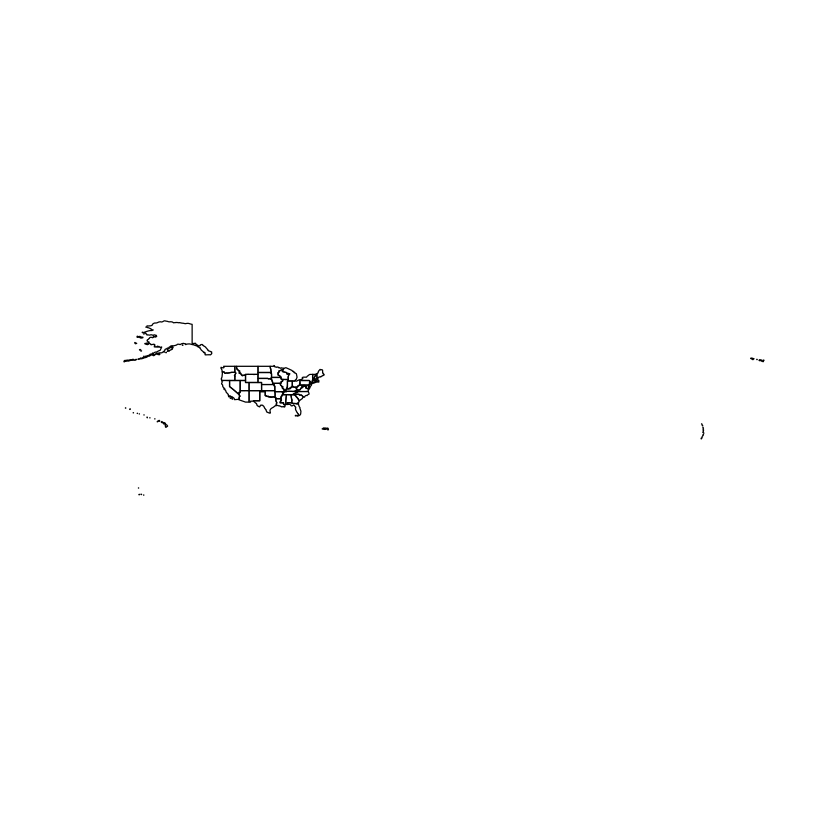

In [13]:
plot(state_boundaries["geometry"])

In [ ]:
ggplot(dc_md_va_states) +
  geom_sf(color = "firebrick", fill = "gray") +
    theme_void()

Warning message in layer_sf(geom = GeomSf, data = data, mapping = mapping, stat = stat, :
“Ignoring unknown parameters: `width`”
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


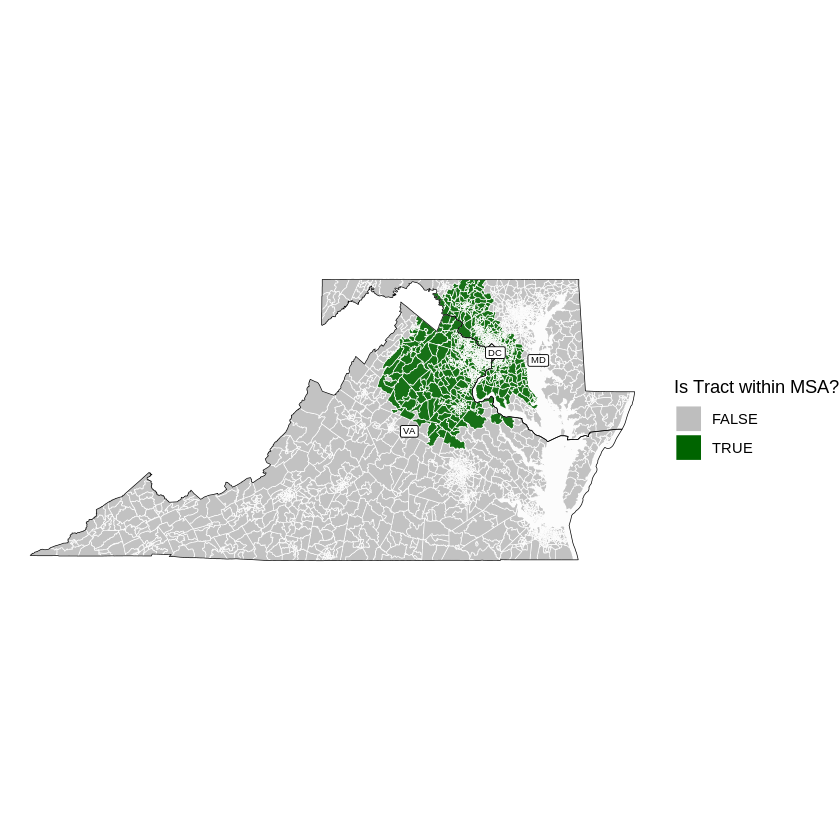

In [14]:
ggplot(dc_md_va_tracts) +
  geom_sf(aes(fill = keep_tract), color = "white") +
  geom_sf(data = dc_md_va_states, color = "black", width = 2, alpha = 0.1) +
  geom_sf_label(data = dc_md_va_states, aes(label = STUSPS), size = 2) +
  theme_void() +
  scale_fill_manual(values =c("TRUE" = "darkgreen", "FALSE" = "gray")) +
  labs(fill = "Is Tract within MSA?")

Warning message in layer_sf(geom = GeomSf, data = data, mapping = mapping, stat = stat, :
“Ignoring unknown parameters: `width`”


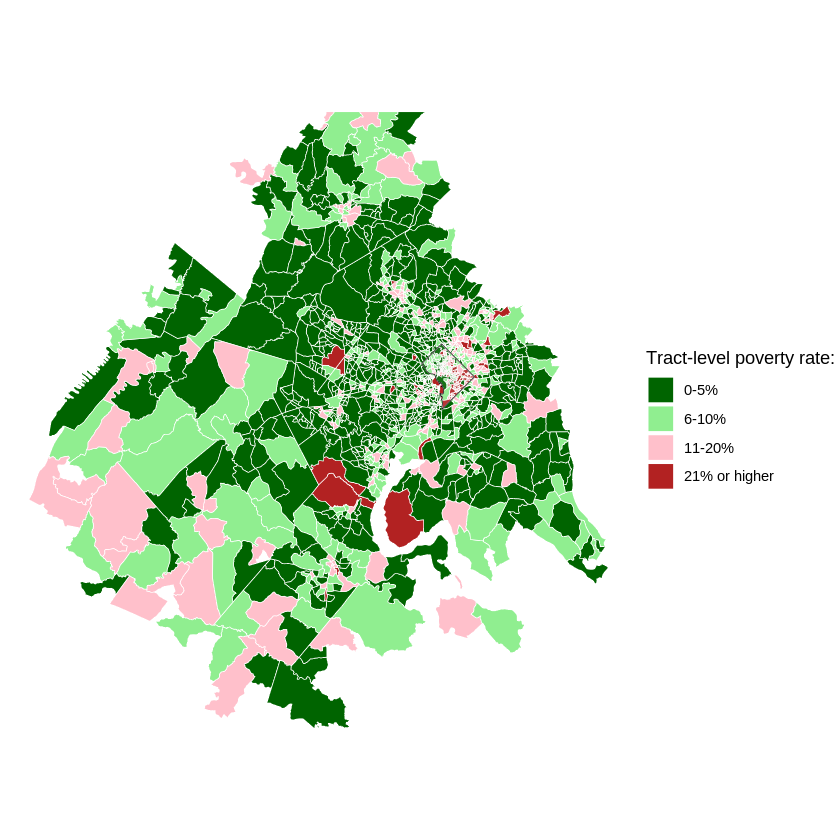

In [15]:
dc_md_va_msatracts <- dc_md_va_msatracts %>%
            mutate(poverty_cat = factor(case_when(poverty_rate < 0.06 ~ "0-5%",
                                                  poverty_rate < 0.11 ~ "6-10%",
                                                  poverty_rate < 0.21 ~ "11-20%",
                                                  TRUE ~ "21% or higher"),
                                        levels = c("0-5%",
                                                    "6-10%",
                                                    "11-20%",
                                                    "21% or higher"),
                                        ordered = TRUE))


ggplot(dc_md_va_msatracts) +
  geom_sf(aes(fill = poverty_cat), color = "white") +
  geom_sf(data = dc_md_va_states %>% filter(STUSPS == "DC"),
          color = "black", width = 2, alpha = 0.1) +
  theme_void() +
  labs(fill = "Tract-level poverty rate:") +
  scale_fill_manual(values = c("0-5%" = "darkgreen",
                               "6-10%" = "lightgreen",
                               "11-20%" = "pink",
                               "21% or higher" = "firebrick"))

## Question 3

In [25]:
head(dc_md_va_states)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [°]>
1,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,MULTIPOLYGON (((-77.45881 3...
2,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258180558,8528070310,+37.5222512,-078.6681938,MULTIPOLYGON (((-78.86926 3...
3,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316124,18709762,+38.9042474,-077.0165167,MULTIPOLYGON (((-77.11975 3...


Reading layer `Homeless_Service_Facilities' from data source 
  `/content/Homeless_Service_Facilities.geojson' using driver `GeoJSON'
Simple feature collection with 115 features and 68 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -77.09718 ymin: 38.82999 xmax: -76.92901 ymax: 38.98029
Geodetic CRS:  WGS 84


although coordinates are longitude/latitude, st_overlaps assumes that they are
planar



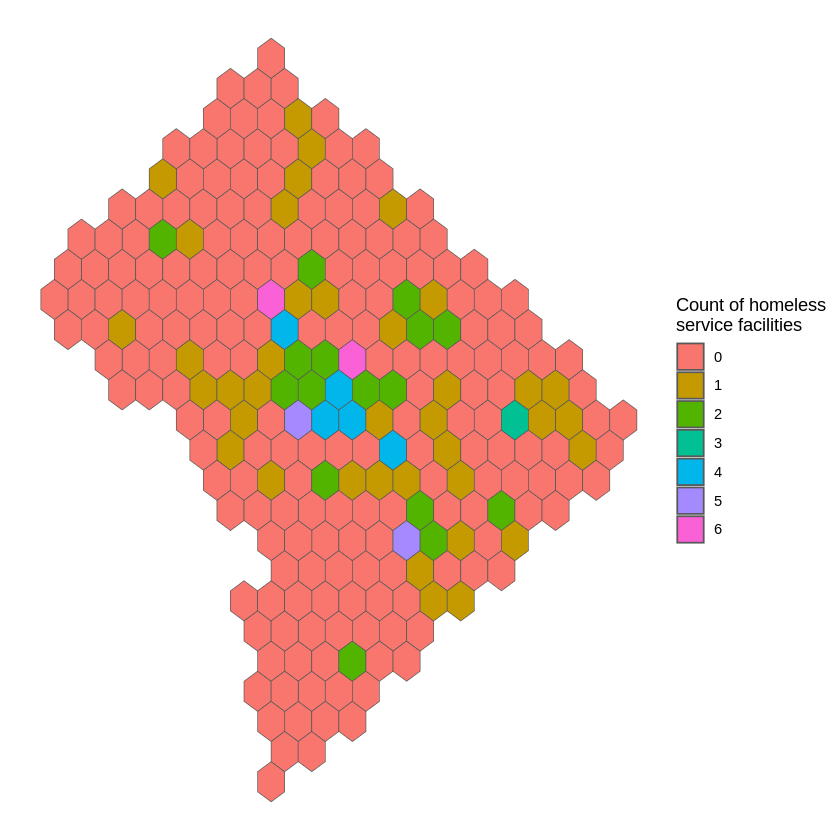

In [18]:
homeless_facilities <- sf::st_read("Homeless_Service_Facilities.geojson")

dc_polygon <- dc_md_va_states %>% filter(STUSPS == "DC")
hex_grid <- st_make_grid(dc_polygon,
                        cellsize = 0.01,
                        what = 'polygons',
                        square = FALSE) %>%
            st_as_sf()

hex_grid_dc <- hex_grid[c(unlist(st_contains(dc_polygon, hex_grid)),
                         unlist(st_overlaps(dc_polygon, hex_grid))), ]

## add poverty rate
counts_per_hex <- st_intersects(hex_grid_dc,
                      homeless_facilities %>% st_transform(crs = st_crs(hex_grid_dc)))
hex_grid_dc$homeless_facilities_counts <- lengths(counts_per_hex)


ggplot(hex_grid_dc) +
  geom_sf(aes(fill = factor(homeless_facilities_counts))) +
  theme_void() +
  labs(fill = "Count of homeless\nservice facilities")

Reading layer `cctv-street-cameras' from data source 
  `/content/cctv-street-cameras.geojson' using driver `GeoJSON'
Simple feature collection with 596 features and 36 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -77.1118 ymin: 38.81301 xmax: -76.91334 ymax: 38.99229
Geodetic CRS:  WGS 84


although coordinates are longitude/latitude, st_overlaps assumes that they are
planar



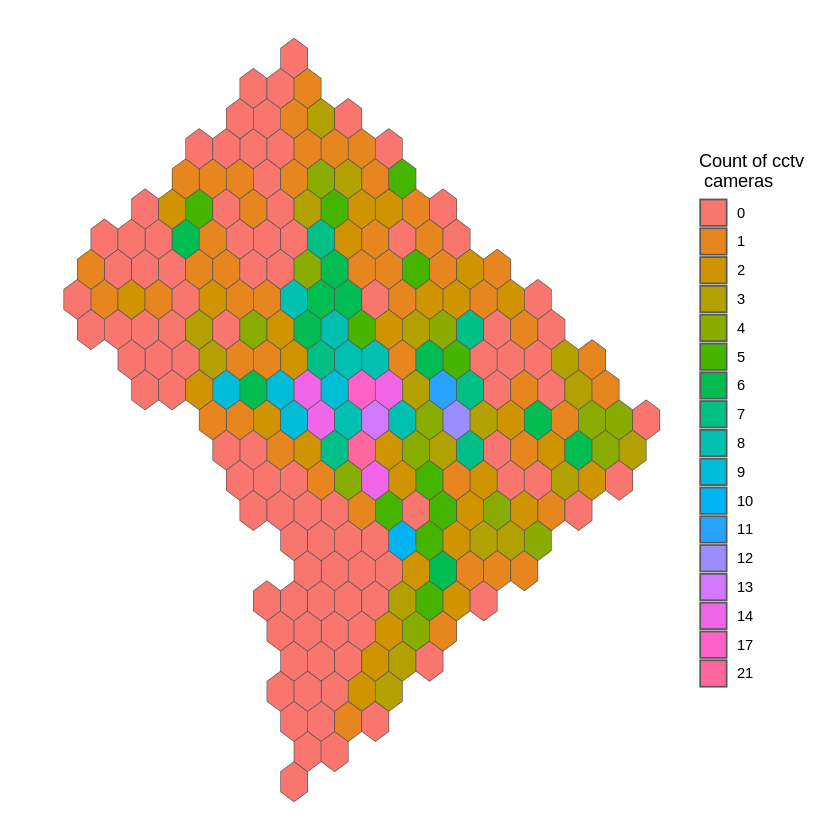

In [28]:
# repeat with cctv cameras
cctv_data <- sf::st_read("cctv-street-cameras.geojson")

dc_polygon <- dc_md_va_states %>% filter(STUSPS == "DC")
hex_grid <- st_make_grid(dc_polygon,
                        cellsize = 0.01,
                        what = 'polygons',
                        square = FALSE) %>%
            st_as_sf()

hex_grid_dc <- hex_grid[c(unlist(st_contains(dc_polygon, hex_grid)),
                         unlist(st_overlaps(dc_polygon, hex_grid))), ]

## add poverty rate
counts_per_hex <- st_intersects(hex_grid_dc,
                      cctv_data %>% st_transform(crs = st_crs(hex_grid_dc)))
hex_grid_dc$cctv_camera_counts <- lengths(counts_per_hex)


ggplot(hex_grid_dc) +
  geom_sf(aes(fill = factor(cctv_camera_counts))) +
  theme_void() +
  labs(fill = "Count of cctv\n cameras")

In [24]:
unique(cctv_data$NAME)

[1] "CCTV"                                                              
  [2] " 10S"                                                              
  [3] "3N"                                                                
  [4] "12S"                                                               
  [5] "Takoma Community Center"                                           
  [6] "Harvard Towers"                                                    
  [7] "Knox Hill"                                                         
  [8] "Potomac Gardens"                                                   
  [9] "DCHA HQ"                                                           
 [10] "Evans Middle School"                                               
 [11] "Logan Annex"                                                       
 [12] "Phelps High School"                                                
 [13] "Wheatley Elementary School"                                        
 [14] "CCTV-0043"                                                         
 [15] "Eaton Elementary School"                                           
 [16] "CCTV-0127"                                                         
 [17] "CCTV-0098"                                                         
 [18] "1N"                                                                
 [19] "6S"                                                                
 [20] "7S"                                                                
 [21] "6N"                                                                
 [22] "5N"                                                                
 [23] "11S"                                                               
 [24] "2N"                                                                
 [25] "CCTV-0072"                                                         
 [26] "CCTV-0109"                                                         
 [27] "CCTV-0107"                                                         
 [28] "CCTV-0115"                                                         
 [29] "CCTV-0116"                                                         
 [30] "CCTV-0119"                                                         
 [31] "Thomson Elementary School"                                         
 [32] "CCTV-0001"                                                         
 [33] "CCTV-0029"                                                         
 [34] "LaSalle Elementary School"                                         
 [35] "M.L. King Elementary School"                                       
 [36] "Rudolph Elementary School"                                         
 [37] "King Greenleaf Recreation Center"                                  
 [38] "CCTV-0004"                                                         
 [39] "Lamond Recreation Center"                                          
 [40] "CCTV-0077"                                                         
 [41] "CCTV-0095"                                                         
 [42] "Gibbs Elementary School"                                           
 [43] "Langdon Elementary School"                                         
 [44] "Orr Elementary School"                                             
 [45] "CCTV-0021"                                                         
 [46] "V Street HQ"                                                       
 [47] "Young Elementary School"                                           
 [48] "Spingarn Center @ Spingarn Senior High School"                     
 [49] "Spingarn STAY Senior High School"                                  
 [50] "Spingarn Senior High School"                                       
 [51] "Garfield Elementary School"                                        
 [52] "Browne Junior High School"                                         
 [53] "Browne Center @ Browne Junior High School"                         
 [54] "Stanton Elementary S